<a href="https://colab.research.google.com/github/2303a51508/AIML_2025/blob/main/AI_FOR_SUSTAINABLE_AGRICULTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI FOR SUSTAINABLE AGRICULTURE

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            print(os.path.join(dirname, filename))

            # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"


IMPORT DATASET

In [ ]:
df = pd. read_csv("/content/market_researcher_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Market_ID,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Seasonal_Factor,Consumer_Trend_Index
0,1,Rice,180.251212,196.085900,199.509124,300.549219,1.093636,28.474810,Medium,148.472131
1,2,Rice,420.527970,188.452400,150.789483,492.097798,0.526307,70.978063,High,97.298888
2,3,Wheat,457.260398,171.179384,78.989326,323.003342,1.292393,80.853592,Low,131.113236
3,4,Soybean,237.179113,196.970677,50.464363,232.978384,0.627663,60.676069,Low,95.169417
4,5,Wheat,324.032925,113.165416,145.878647,312.428652,1.491255,45.379516,Low,130.297138


In [ ]:
df.tail()

,Market_ID,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Seasonal_Factor,Consumer_Trend_Index
9995,9996,Soybean,461.784414,167.259003,173.254864,475.142179,1.469265,56.512910,Low,141.079361
9996,9997,Wheat,206.063654,165.032651,108.840340,347.241575,0.538033,87.047845,High,70.043016
9997,9998,Rice,394.093541,129.124985,150.882638,496.836137,0.993171,99.346343,Medium,52.535276
9998,9999,Wheat,398.055217,99.089530,125.555089,121.755148,1.120434,94.938699,High,142.802760
9999,10000,Soybean,174.674564,83.365737,163.541325,429.829176,1.017650,33.520691,Low,122.042104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Market_ID                 10000 non-null  int64  
 1   Product                   10000 non-null  object 
 2   Market_Price_per_ton      10000 non-null  float64
 3   Demand_Index              10000 non-null  float64
 4   Supply_Index              10000 non-null  float64
 5   Competitor_Price_per_ton  10000 non-null  float64
 6   Economic_Indicator        10000 non-null  float64
 7   Weather_Impact_Score      10000 non-null  float64
 8   Seasonal_Factor           10000 non-null  object 
 9   Consumer_Trend_Index      10000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,Market_ID,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Consumer_Trend_Index
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,299.645429,125.093568,125.050815,300.811000,1.003514,50.429491,99.577175
std,2886.89568,115.827248,43.294001,43.067888,115.529938,0.291315,29.086479,28.849323
min,1.00000,100.037672,50.025587,50.024338,100.056917,0.500231,0.037550,50.005314
25%,2500.75000,198.417882,87.542376,87.979919,201.020246,0.751027,25.089886,74.534404
50%,5000.50000,300.389982,124.281852,124.655779,302.366876,1.008187,50.642166,99.456034
75%,7500.25000,399.950988,162.295042,161.747421,401.918023,1.256631,75.547328,124.758656
max,10000.00000,499.999056,199.997449,199.991317,499.916582,1.499887,99.999365,149.997429


In [ ]:
df.dtypes

,0
Market_ID,int64
Product,object
Market_Price_per_ton,float64
Demand_Index,float64
Supply_Index,float64
Competitor_Price_per_ton,float64
Economic_Indicator,float64
Weather_Impact_Score,float64
Seasonal_Factor,object
Consumer_Trend_Index,float64


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.isnull().sum()

,0
Market_ID,0
Product,0
Market_Price_per_ton,0
Demand_Index,0
Supply_Index,0
Competitor_Price_per_ton,0
Economic_Indicator,0
Weather_Impact_Score,0
Seasonal_Factor,0
Consumer_Trend_Index,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Market_ID', 'Product', 'Market_Price_per_ton', 'Demand_Index',
       'Supply_Index', 'Competitor_Price_per_ton', 'Economic_Indicator',
       'Weather_Impact_Score', 'Seasonal_Factor', 'Consumer_Trend_Index'],
      dtype='object')

DATA VISUALIZATIONS

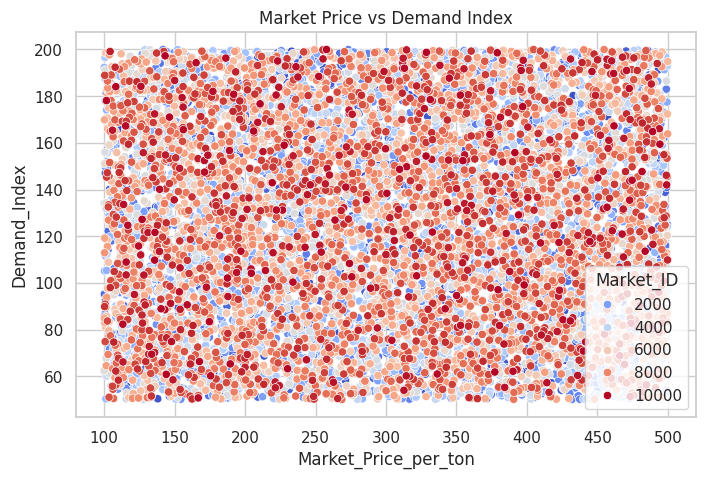

In [ ]:
sns.set_theme(style="whitegrid")

# 1. Market Price vs Demand Index
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Market_Price_per_ton', y='Demand_Index', hue='Market_ID', palette='coolwarm')
plt.title("Market Price vs Demand Index")
plt.show()

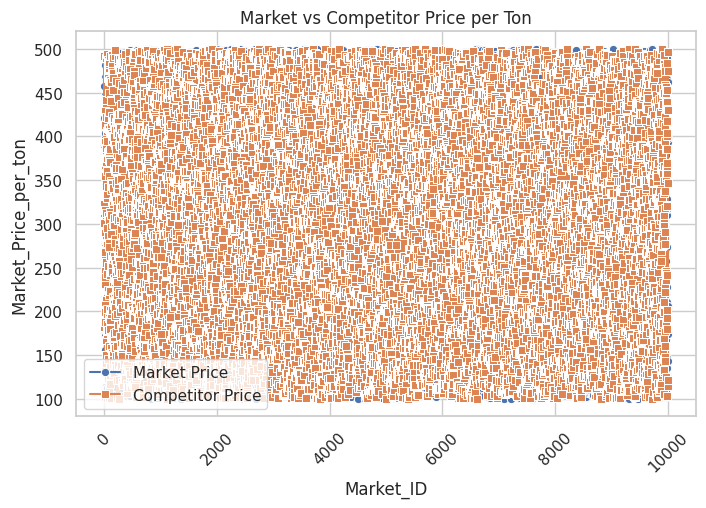

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Market_ID', y='Market_Price_per_ton', label='Market Price', marker='o')
sns.lineplot(data=df, x='Market_ID', y='Competitor_Price_per_ton', label='Competitor Price', marker='s')
plt.xticks(rotation=45)
plt.title("Market vs Competitor Price per Ton")
plt.legend()
plt.show()

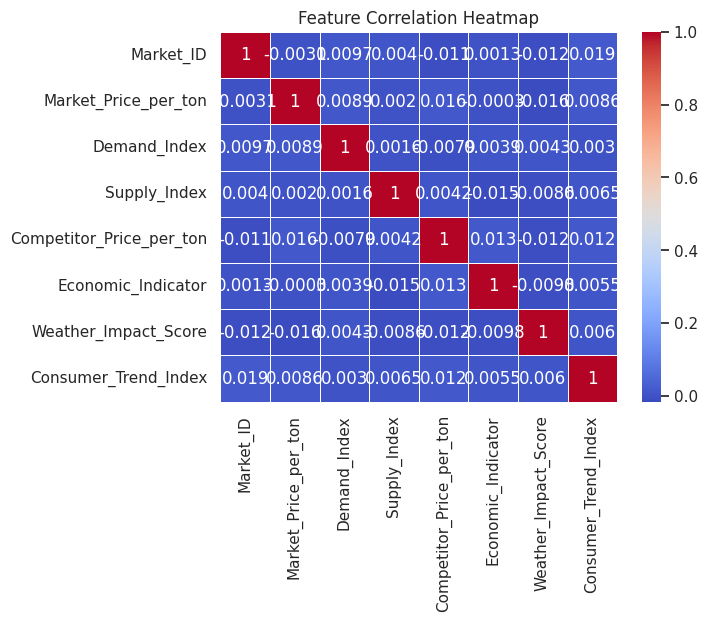

In [ ]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

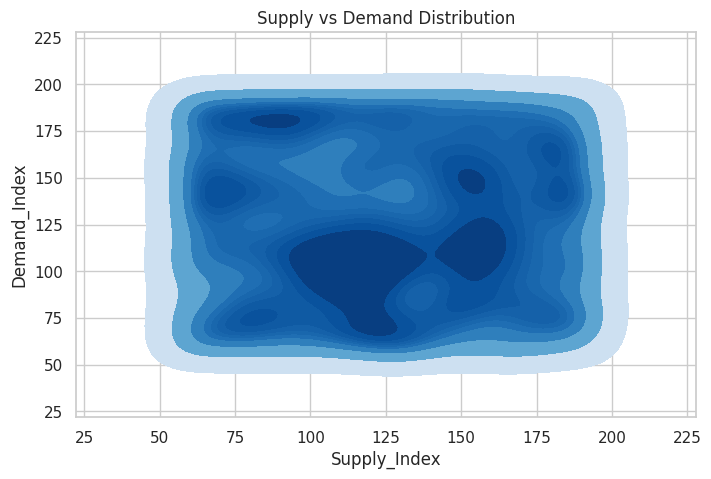

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Supply_Index', y='Demand_Index', cmap='Blues', fill=True)
plt.title("Supply vs Demand Distribution")
plt.show()


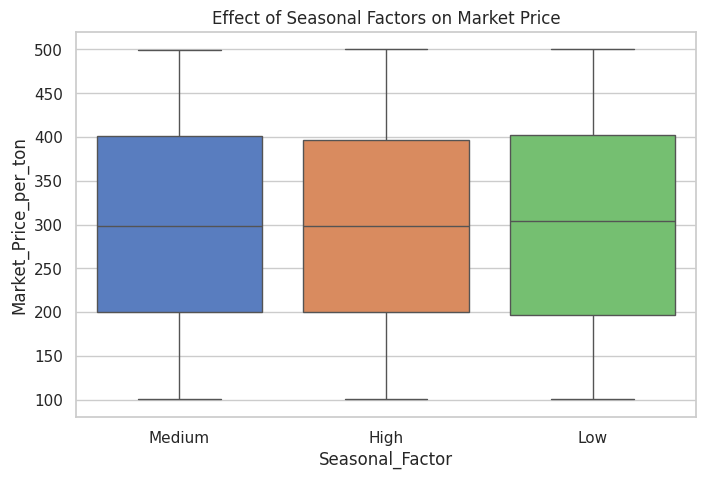

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Seasonal_Factor', y='Market_Price_per_ton', palette='muted')
plt.title("Effect of Seasonal Factors on Market Price")
plt.show()